# Face Recognition

In [1]:
import conx as cx

Using Theano backend.
Conx, version 3.6.0


In [2]:
faces = cx.Dataset.get('cmu_faces_half_size')

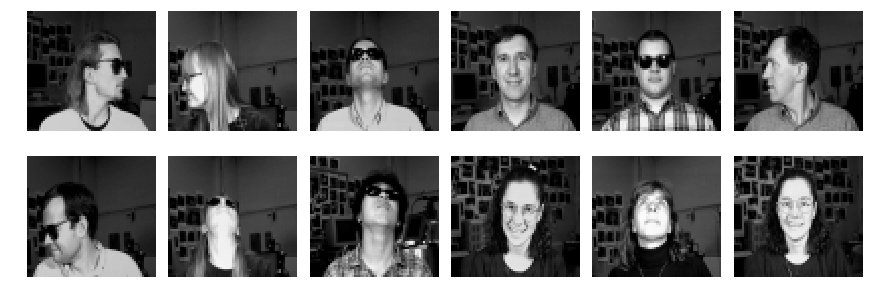

In [3]:
faces.shuffle()
cx.view(faces.inputs[0:12], layout=(2,6), scale=2)

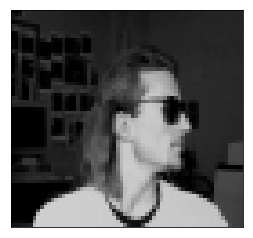

In [4]:
cx.view(faces.inputs[0])

In [5]:
faces.targets[0]

[0, 0, 0, 1]

In [6]:
cx.shape(faces.inputs[0])

(60, 64)

In [7]:
net = cx.Network("Pose Recognizer")

net.add(cx.Layer('input', cx.shape(faces.inputs[0])),
        cx.FlattenLayer("flatten"),
        cx.Layer('hidden', 3, activation='sigmoid'),
        cx.Layer('output', 4, activation='sigmoid'))

net.connect()

net.compile(loss='mean_squared_error', optimizer="SGD", lr=0.2, momentum=0.1)

In [8]:
net.set_dataset(faces)
faces.split(0.30)  # reserve 30% of input data for testing set
faces.summary()

_________________________________________________________________
CMU Faces, half-size:
Patterns    Shape                 Range                         
inputs      (60, 64)              (0.0, 1.0)                    
targets     (4,)                  (0, 1)                        
Total patterns: 624
   Training patterns: 437
   Testing patterns: 187
_________________________________________________________________


In [9]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 60, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 11523     
_________________________________________________________________
output (Dense)               (None, 4)                 16        
Total params: 11,539
Trainable params: 11,539
Non-trainable params: 0
_________________________________________________________________


In [10]:
net.propagate(faces.inputs[3])

[0.5489193797111511,
 0.41910219192504883,
 0.4797622263431549,
 0.5765119194984436]

In [11]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', options=('Test', 'Train'), rows=1, value='Test'), FloatSlider(value=0.3, continuous_update=False, description='Zoom', layout=Layout(width='65%'), max=1.0, style=SliderStyle(description_width='initial')), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=True, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=1.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'flatten', 'hidden', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPIBAY8AANAAAK8AAAIC8wAAsAAAbwAA0AAAkPr2+vPn8wAAVkdH/7a2///X1/+YmP+Ghv+2tpaW/yYm//9nZ/8mJv9WVnh4//84OP8VFdfX/2Zm//92dlhY//9GRjU1///Fxf+mpoaG/xYW/8jI/6Wl/38AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

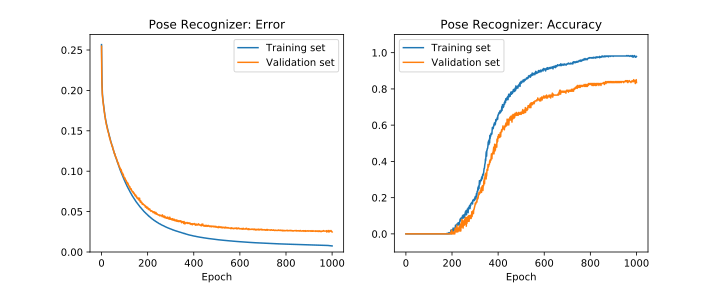

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
# 1000 |   0.00750 |   0.97936 |   0.02478 |   0.83511 


In [12]:
net.train(1000, accuracy=1.0, tolerance=0.2, report_rate=5)

In [13]:
net.evaluate()

{'acc': 0.9816933638443935,
 'loss': 0.007463851087946163,
 'val_acc': 0.8342245976555156,
 'val_loss': 0.024856202264520573}

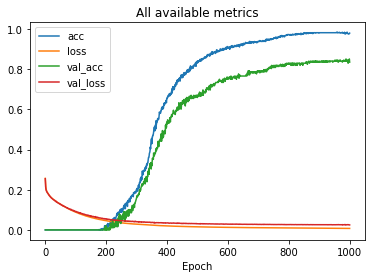

In [14]:
net.plot("all", title="All available metrics")

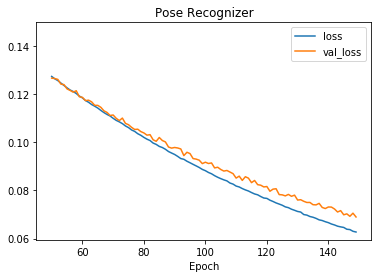

In [15]:
net.plot(['loss', 'val_loss'], ymax=0.15, start=50, end=150)

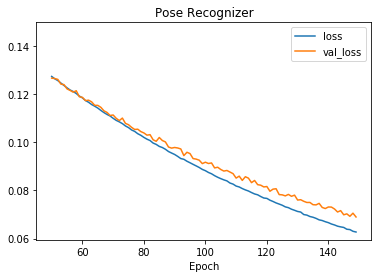

In [16]:
net.plot(['.*loss'], ymax=0.15, start=50, end=150)

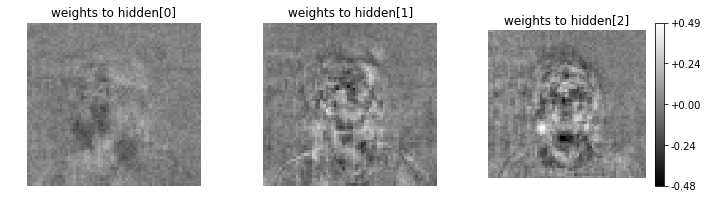

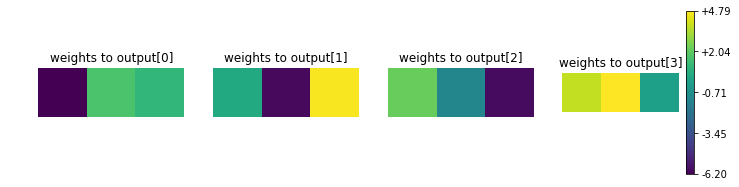

In [17]:
net.plot_layer_weights('hidden', vshape=faces.inputs.shape[0])
net.plot_layer_weights('output', colormap='viridis')

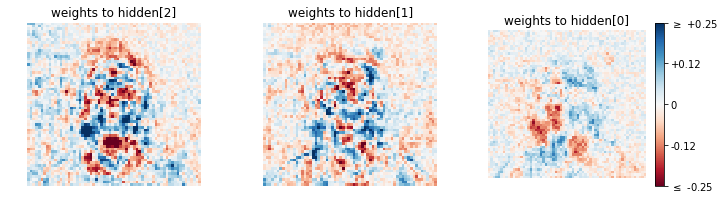

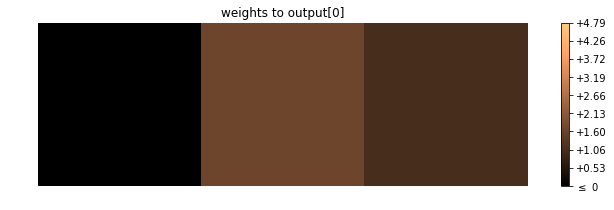

In [18]:
# colorbar colors or values can be easily changed
net.plot_layer_weights('hidden', vshape=net.dataset.inputs.shape[0], 
                       units=(2,1,0), colormap="RdBu", wrange=(-0.25, 0.25))
net.plot_layer_weights('output', units=0, wmin=0, colormap="copper", ticks=10)

In [19]:
net.show_unit_weights('output', 0)

-6.20  1.68  1.09 


In [20]:
net.get_weights("output")

[[[-6.198843479156494,
   0.48533692955970764,
   2.2441534996032715,
   3.789884567260742],
  [1.6767936944961548,
   -5.901026248931885,
   -1.1506351232528687,
   4.787131309509277],
  [1.0861774682998657,
   4.698576927185059,
   -5.883935928344727,
   -0.006406568922102451]],
 [0.4804971516132355,
  -2.6081082820892334,
  0.9343416690826416,
  -6.336297988891602]]

In [22]:
faces.labels[:10]

['neil_right_neutral_sunglasses',
 'paula_left_angry_eyes',
 'bob_up_neutral_sunglasses',
 'tom_forward_happy_eyes',
 'owen_forward_neutral_sunglasses',
 'tom_left_angry_eyes',
 'bob_left_angry_sunglasses',
 'paula_up_sad_sunglasses',
 'alex_up_angry_sunglasses',
 'quinn_forward_angry_eyes']